Author: Amelia Xie

Dates: 24/09/22, 4/10/22, 10/10/22

24/09/22

# Sub-question

What are the trends for hourly step count data across the week?

Let's load in the data

In [9]:
import pandas as pd 
PATH = '../../../datasets/Modified_dataset04.csv'
p4 = pd.read_csv(PATH)
p4_copy = p4.copy() #make a copy of the data

Let's visualise the distribution of the hourly step count data for each day of the week.

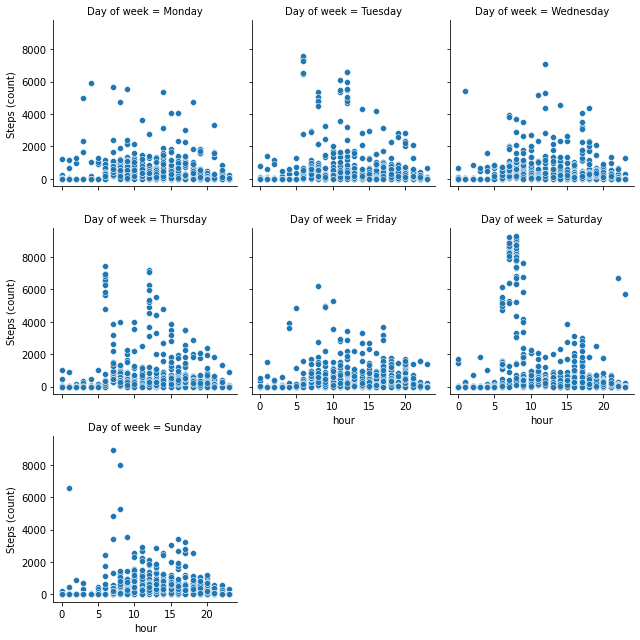

In [10]:
import seaborn as sns
# plot a subplot for each day to clearly visualise hourly trends
plot = sns.FacetGrid(p4, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.scatterplot, "hour", "Steps (count)")

From the plots we can see that this participant tends to walk more steps  more frequently on Saturday mornings, and are exercises less on most other days.

Let's visualise the participant's adherence to their tracker.

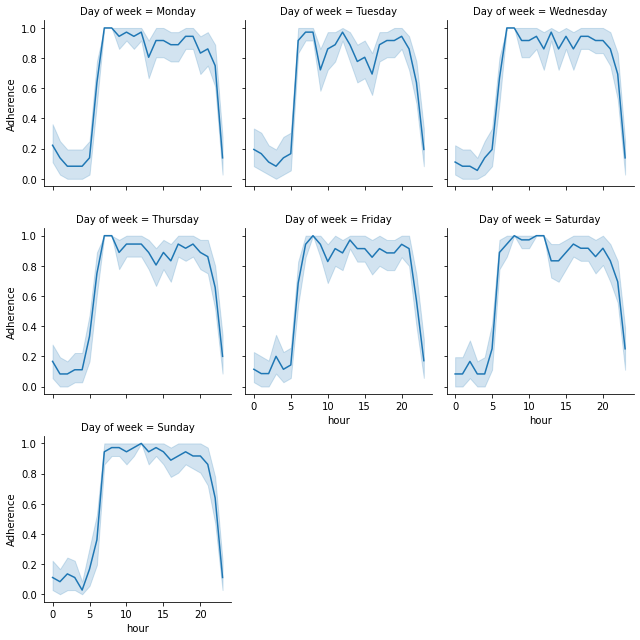

In [11]:
p4_adh = p4.copy() # make a copy of the data
# filter out values where step counts are zero
p4_adh['Adherence'] = p4['Steps (count)'] > 0
# plot a subplot for each day to clearly visualise hourly trends
plot = sns.FacetGrid(p4_adh, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.lineplot, "hour", "Adherence")

This participant appears to have fairly consistent adherence levels for the periods of time they engage in physical activity for each day of the week.

4/10/22

Let's examine how hourly fitness activity differs between the weekends and weekdays

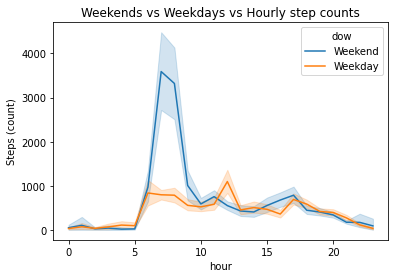

In [12]:
from datetime import datetime
# create a new column that indicates for each step count value whether it occurred on a weekday or weekend
p4_copy['dow'] = p4_copy['Day of week'].apply(lambda x: "Weekday" if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else "Weekend")
plot = sns.lineplot(data = p4_copy, hue = 'dow', x ='hour' , y = "Steps (count)").set(title= 'Weekends vs Weekdays vs Hourly step counts')

This participant is clearly a lot more active on the weekends than weekdays. It is interesting how there is a very sharp peak on weekend mornings and not nearly as much activity on weekdays.

10/10/22

The hourly trends can be more closely analysed with a heatmap.

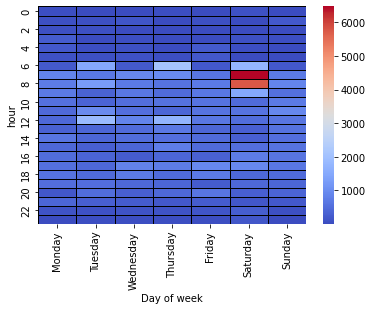

In [13]:
# code taken from Emily's TPP09 notebook
# obtain the mean step counts for each hour of each day of the week
hour_dow_count = p4_copy.groupby(['hour','Day of week']).agg({'Steps (count)': 'mean'}).reset_index()
# change the format such that each cell contains a step count value
hour_dow_count = hour_dow_count.pivot("hour", "Day of week", "Steps (count)")
# change the order of the days of the week
hour_dow_count = hour_dow_count.reindex(
    columns = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'])
# plot the heatmap
hmap = sns.heatmap(hour_dow_count, cmap="coolwarm", linewidths=.5, linecolor = 'black')

Here, you can clearly see that hours 7 - 8 on Saturdays are when the number of step counts reaches its peak.

## References
* pandas.DataFrame.sort_values — pandas 1.5.0 documentation. Pandas. (2022). Retrieved 10 October 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html.
* 5 ways to apply an IF condition in Pandas DataFrame - Data to Fish. Data to Fish. (2022). Retrieved 10 October 2022, from https://datatofish.com/if-condition-in-pandas-dataframe/.